<h1 style='text-align:center;color: white;background-color: blue;text-decoration: underline;font-family: "Sofia", sans-serif'>SALARY PROJECT</h1>

<h3>Problem Statement :- Predict the salary if the employee using the features provided in the data.</h3>

In [128]:
import pandas as pd

<h3>Load the data set<h3>

In [129]:
df_sal=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [130]:
df_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


<h3> Above dataset is based on salary. i will predict the salary value based on discipline and no of years etc.now i am start the analysis..<h3>

In [131]:
df_sal.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [132]:
df_sal.tail(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [133]:
df_sal.shape

(397, 6)

In [134]:
df_sal.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Null Values

In [135]:
df_sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# EDA

# SCATTERPLOT

<AxesSubplot:xlabel='rank', ylabel='salary'>

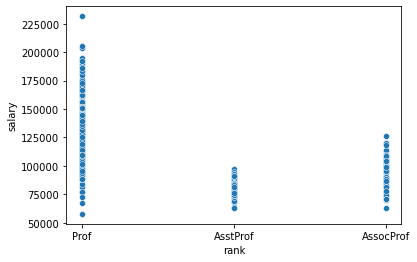

In [178]:

import seaborn as sns
sns.scatterplot(x="rank",y="salary",data=df_sal)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

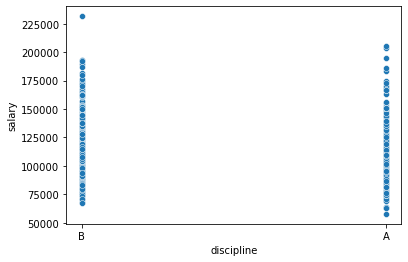

In [179]:
sns.scatterplot(x="discipline",y="salary",data=df_sal)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

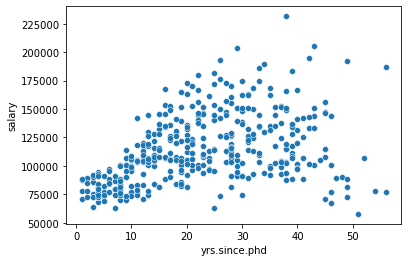

In [180]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df_sal)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

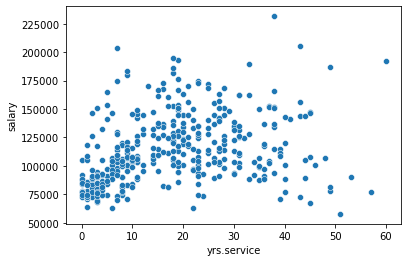

In [181]:
sns.scatterplot(x="yrs.service",y="salary",data=df_sal)

<AxesSubplot:xlabel='sex', ylabel='salary'>

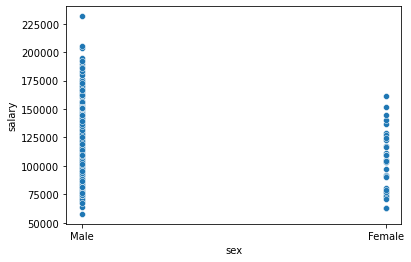

In [182]:
sns.scatterplot(x="sex",y="salary",data=df_sal)

Correlation

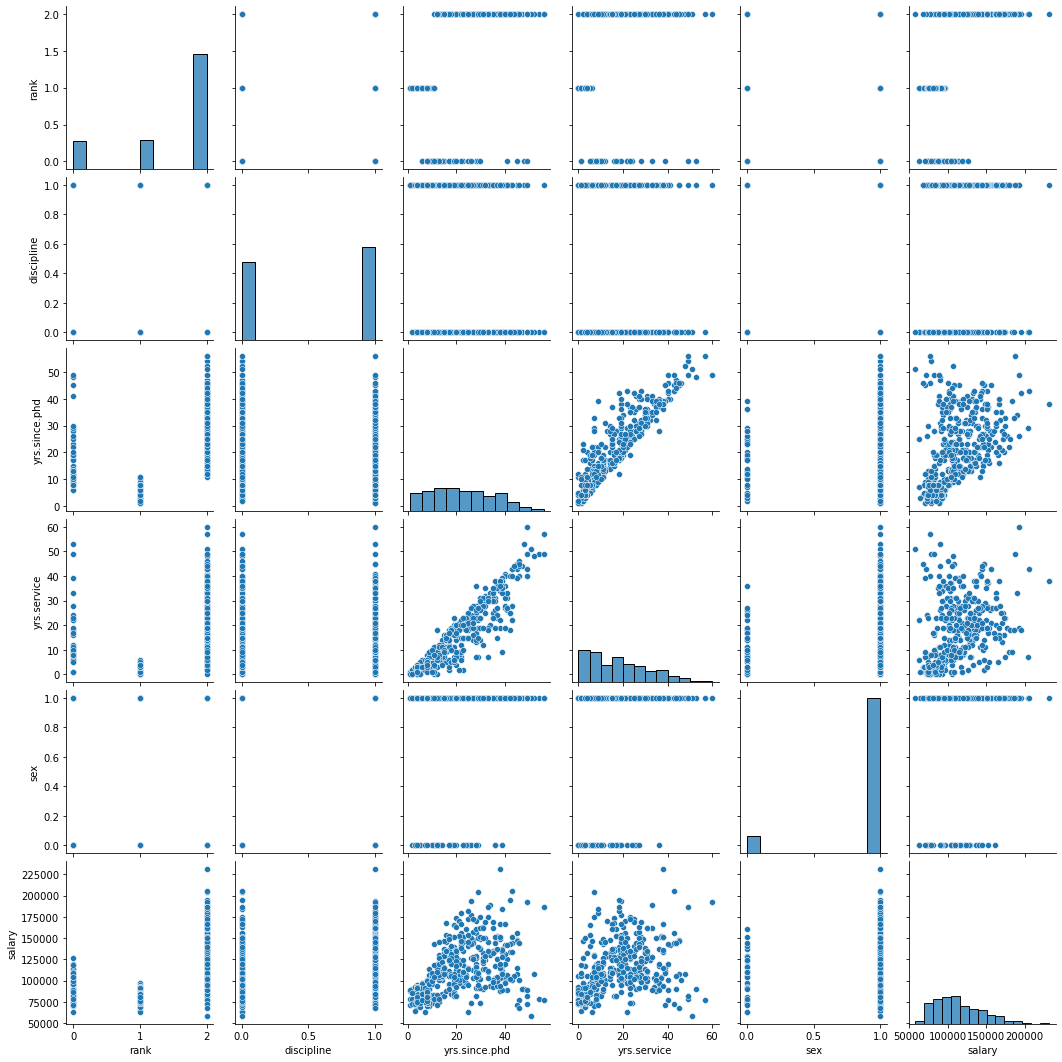

In [226]:
sns.pairplot(df_sal)

# CORRELATION

In [183]:
df_sal.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

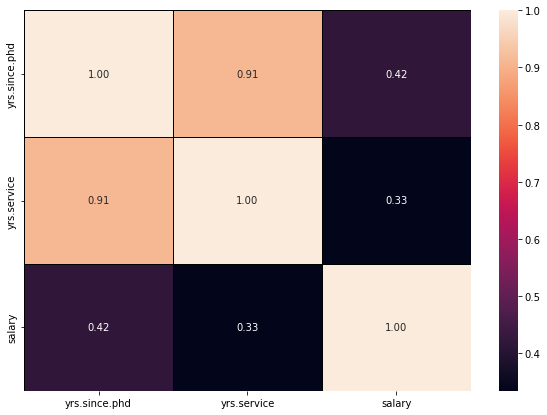

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df_sal.corr(), annot=True, linewidth=0.5,linecolor="black", fmt = '.2f')

# Describing Data

In [185]:
df_sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


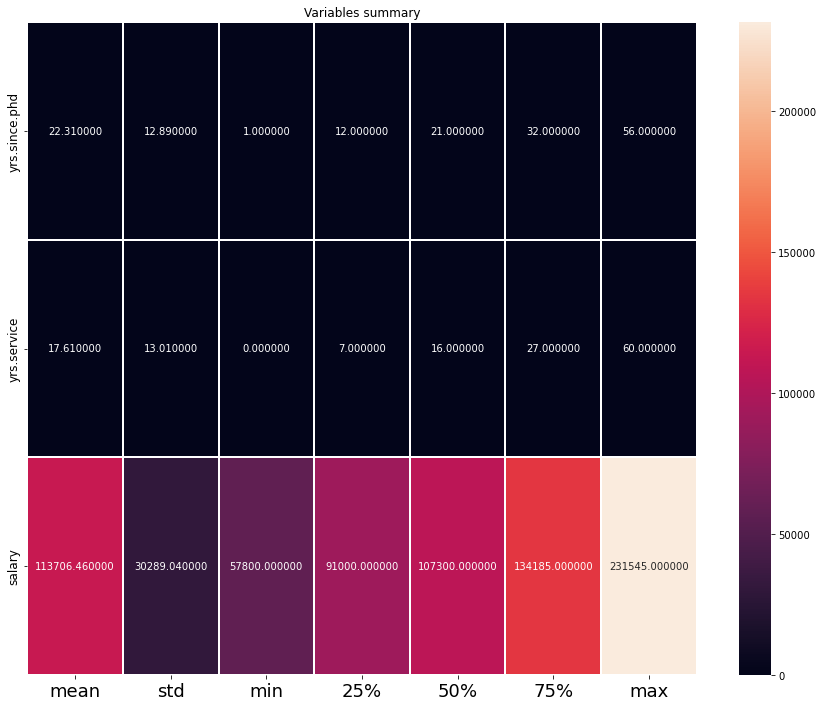

In [186]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df_sal.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

In [187]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


from the above code we are having column data type and memory used by dataframe

In [188]:
df_sal.shape

(397, 6)

In [189]:
import warnings
warnings.filterwarnings('ignore')

# SKEWNESS

In [190]:
df_sal.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# OUTLIERS

<AxesSubplot:xlabel='salary'>

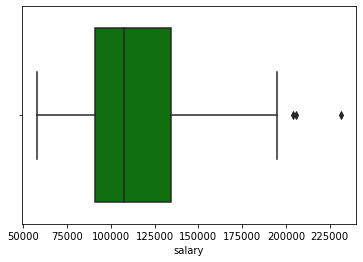

In [191]:
sns.boxplot(df_sal['salary'],color='green',orient='v')

<AxesSubplot:xlabel='yrs.service'>

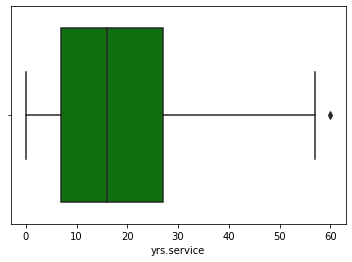

In [192]:
sns.boxplot(df_sal['yrs.service'],color='green',orient='v')

<AxesSubplot:xlabel='yrs.since.phd'>

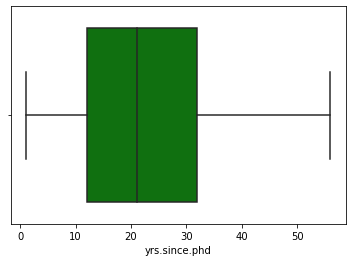

In [193]:
sns.boxplot(df_sal['yrs.since.phd'],color='green',orient='v')

# NORMAL DISTRIBUTION CURVE

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

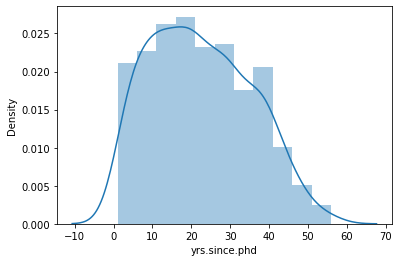

In [194]:
sns.distplot(df_sal["yrs.since.phd"])

the data plot is not normalised because the building blocks are out of normal curve

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

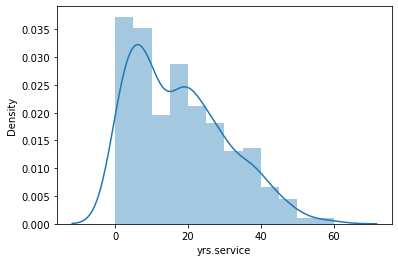

In [195]:
sns.distplot(df_sal["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

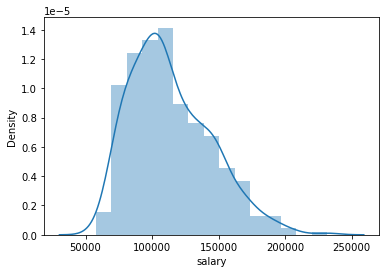

In [196]:
sns.distplot(df_sal['salary'])

The normal distribution curve of outcome is irrelevant

# ENCODING

In [197]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [198]:
for i in df_sal.columns:
    if df_sal[i].dtypes=="object":
        df_sal[i]=oe.fit_transform(df_sal[i].values.reshape(-1,1))


In [199]:
df_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


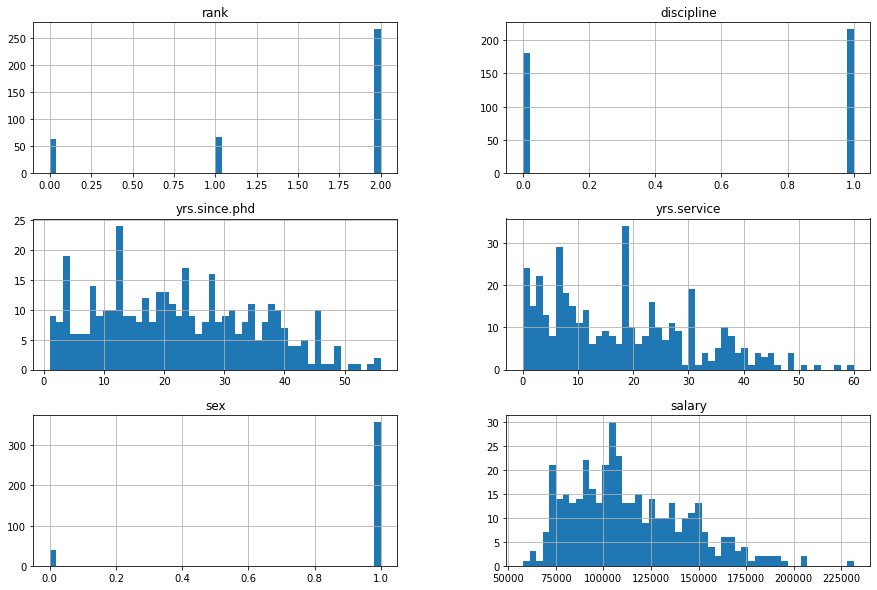

In [227]:
df_sal.hist(bins = 50, figsize = (15,10))
plt.show()

# OUTLIERSS

In [228]:
import numpy as np

In [229]:
from scipy.stats import zscore

z=np.abs(zscore(df_sal))
threshold=3
np.where(z>3)

 

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [230]:
df_sal.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


New data frame

In [231]:
 df_new_sal=df_sal[(z<3).all(axis=1)]

    

In [232]:
df_new_sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# LOSS OF DATA

In [207]:
df_sal.shape

(397, 6)

In [208]:
df_new_sal.shape

(354, 6)

In [209]:
data_loss=((397-354)/397)*100
data_loss

10.831234256926953

the percentage of data loss is 10.83

In [210]:
x=df_new_sal.iloc[:, : -1].values
y=df_new_sal.iloc[: , -1].values

In [211]:
x.shape

(354, 5)

In [212]:
y.shape

(354,)

# LINEAR REGRESSION

In [213]:
from sklearn.linear_model import LinearRegression
lr_sal=LinearRegression()

In [214]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)


In [215]:
lr_sal.fit(x_train,y_train)

LinearRegression()

In [216]:
x_train.shape

(247, 5)

In [217]:
y_train.shape

(247,)

In [218]:
x_test.shape

(107, 5)

In [219]:
y_test.shape

(107,)

In [220]:
lr_sal.coef_

array([16791.8669427 , 14356.68912648,  1211.47960029,  -675.36548584,
           0.        ])

# PREDICTING THE VALUES

In [221]:
pred_test=lr_sal.predict(x_test)
print("Predicted value: ",pred_test)
print("Actual value: ",y_test)

Predicted value:  [123772.16873829 126452.73931058 130344.82144668 132691.17142554
 119128.20778522  99753.20693596  89673.21210949 100010.81830766
 141805.1113713  122163.85835845 120813.12738678 142299.44274363
 124767.85167254 124844.42893073 121669.52698612 122365.78384302
 119761.79052893 126195.12793888  87144.11152423 121488.49287261
 121488.46090909 100150.06967904  89963.93346789  86714.13879445
 133839.97691265  99474.7041932  125380.51108166  82919.55725113
 122818.33247322 123256.9459949  129175.09262498 122699.97247291
 134160.26239753 126452.73931058 123632.94933044  86038.77330861
 116663.46584251 116663.46584251 102463.37359825 126633.80538761
  88216.33975314 120694.76738646 115451.98624221 121230.84953739
  89030.95661036 132670.28005448 121766.96365185  83755.06547941
 124983.64833859 125380.51108166 112931.55841237 134494.45102742
 129216.90733063 113049.91841269 133561.47416989  99474.7041932
 135650.24474058 134933.09651262 130087.21007498 134494.45102742
  75316.

# PICKLE

In [222]:
import pickle
filename='salaries.csv.pkl'
pickle.dump(lr_sal, open(filename, 'wb'))

# FINEL CONCLUSION

In [223]:
a=np.array(y_test)
predicted=np.array(lr_sal.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,120000,123772.168738
1,101000,126452.739311
2,107200,130344.821447
3,150480,132691.171426
4,120806,119128.207785
...,...,...
102,91100,120576.407386
103,156938,128597.195768
104,118700,93189.290910
105,107300,118055.979556


# SKEWNESS REMOVE

In [224]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [225]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])